In [1]:
#imports

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy as sp
import h5py

import pytpc

from mpl_toolkits.mplot3d import Axes3D



/home/chen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [15]:
peaks = h5py.File('/home/chen/run_0130_peaks.h5', 'r') #note: peaks file is in a different format, therefore cannot use 
#HDFDataFile to read
for i in peaks:
    print(i)

reduced_get_events


In [9]:
less = pytpc.HDFDataFile('/home/chen/run_0130_less.h5', 'r')

In [10]:
full = pytpc.HDFDataFile('/home/chen/run_0130.h5', 'r')

In [19]:
i = 2349 #corresponding to a single event

dataset_name = '/reduced_get_events'
data_peaks = peaks[dataset_name]
peaks_evt = data_peaks[str(i)]

evt_full = full[i]
xyzs_full = evt_full.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)

evt_less = less[i]
xyzs_less = evt_less.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)

/home/chen/anaconda3/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/evtdata.py:187: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(peak_data * range_idx, axis=-1) / peak_data.sum(axis=-1)


(0, 512)

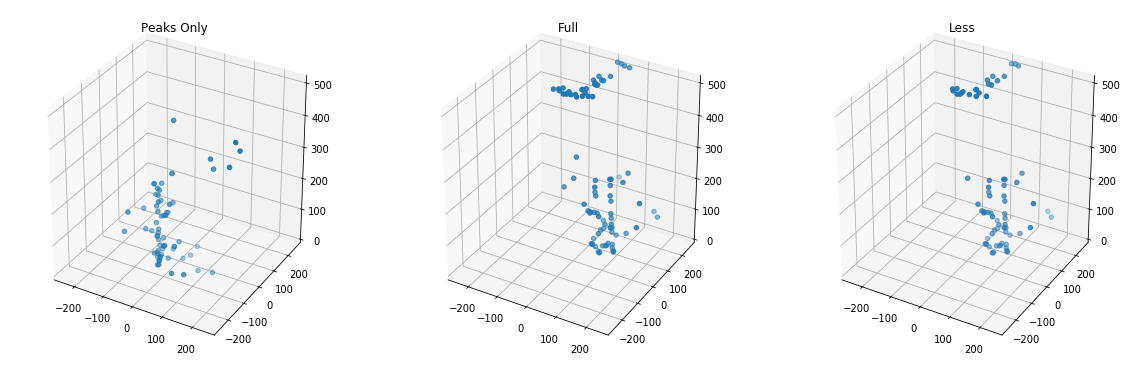

In [24]:
fig = plt.figure(figsize=(20, 14))

ax = fig.add_subplot(2, 3, 1, projection='3d') #2,3,1 meaning the plot will take the 1st position on a grid with 2 rows
#and three columns
ax.scatter(peaks_evt[:,0], peaks_evt[:,1], peaks_evt[:,2])
ax.axis('equal')
ax.set_title("Peaks Only")
ax.set_xlim(-275, 275)
ax.set_ylim(-275, 275)
ax.set_zlim(0, 512)

#######################################################################################################################
ax2 = fig.add_subplot(2, 3, 2, projection='3d')
ax2.scatter(xyzs_full[:,0], xyzs_full[:,1], xyzs_full[:,2])
ax2.axis('equal')
ax2.set_title('Full')
ax2.set_xlim(-275, 275)
ax2.set_ylim(-275, 275)
ax2.set_zlim(0, 512)

#######################################################################################################################
ax3 = fig.add_subplot(2, 3, 3, projection='3d')
ax3.scatter(xyzs_less[:,0], xyzs_less[:,1], xyzs_less[:,2])
ax3.axis('equal')
ax3.set_title('Less')
ax3.set_xlim(-275, 275)
ax3.set_ylim(-275, 275)
ax3.set_zlim(0, 512)